No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['./checkpoints/supervised/pets_entropy_bottleneck_1.0_supervised_beta0.2/metadata.json', './checkpoints/supervised/pets_entropy_bottleneck_1.0_supervised_beta0.8/metadata.json', './checkpoints/supervised/pets_entropy_bottleneck_1.0_supervised_beta0.5/metadata.json', './checkpoints/supervised/pets_entropy_bottleneck_1.0_supervised_beta0.7/metadata.json', './checkpoints/supervised/pets_entropy_bottleneck_1.0_supervised_beta0.9/metadata.json', './checkpoints/supervised/pets_entropy_bottleneck_1.0_supervised_beta0.4/metadata.json', './checkpoints/supervised/pets_entropy_bottleneck_1.0_supervised_beta0.6/metadata.json', './checkpoints/supervised/pets_entropy_bottleneck_1.0_supervised_beta0.75/metadata.json', './checkpoints/supervised/pets_entropy_bottleneck_1.0_supervised_beta0.3/metadata.json', './checkpoints/supervised/pets_entropy_bottleneck_1.0_supervised_beta0.1/metadata.json', './checkpoints/supervised/pets_entropy_bottleneck_1.0_supervised_beta1.0/metadata.json']
[[1.58739765e+04 7.

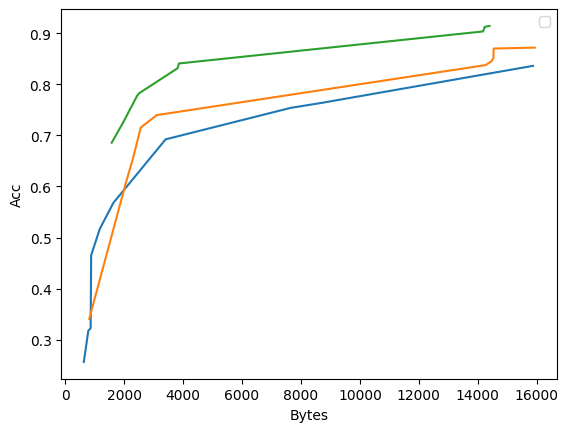

In [122]:
import glob
import json
import matplotlib.pyplot as plt
import numpy as np
import scipy


def plot_curve(files, name=""):
    print(files)
    acc = []
    rate = []
    for f in files:
        with open(f, "r") as fp:
            j = json.load(fp)
            if 'best_top1' in j:
                acc.append(j['best_top1'])
                rate.append(j['best_bytes'])
    
    data = np.array([rate, acc])
    data[1] = data[1]/100
    
    print(data)
    data.sort()
    
    print(data)
    
    plt.plot(data[0], data[1], label=name)

files = glob.glob('./checkpoints/supervised/pets_*/metadata.json')
plot_curve(files, name='full dataset')

files = glob.glob('./checkpoints/supervised_a2/pets_*/metadata.json')
plot_curve(files, name='dataset split A')

files = glob.glob('./checkpoints/supervised_b2/pets_*/metadata.json')
plot_curve(files, name='dataset split B')

plt.xlabel("Bytes")
plt.ylabel("Acc")
plt.legend()